In [1]:
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

Тестовая функция Матьяса и её производные

In [3]:
def f_mat (x, y):
  return 0.26*(x*x +y*y)-0.48*x*y

In [4]:
def dx_mat (x, y):
  return 0.52 *x -0.48*y

In [5]:
def dy_mat(x, y):
  return 0.52 * y - 0.48*x

Тестовая функция трехгорбого верблюда и её производные

In [6]:
def f_3ver (x, y):
  return 2*x*x -1.05 * x**4 + (x**6)/6 + x*y + y*y

In [7]:
def dx_3ver(x, y):
  return x**5 - (21* x**3)/5 +4*x + y

In [8]:
def dy_3ver(x, y):
  return 2*y +x

Функция МакКормика и её производные

In [9]:
def f_him(x, y):
  return (x**2 + y - 11)**2 + (x + y **2 - 7)**2

In [10]:

def dx_him(x, y):
  return 4 * x **3 +(4*y -42) * x +2 * y*y - 14

In [11]:
def dy_him(x, y):
  return 4 * y **3 +(4*x -26) * y +2 * x*x -22

In [12]:
class Lr:
  def __init__(self, lr) -> None:
    self.lr = lr

  def step(self):
    self.lr -= 0.0001

In [13]:
def GD( f, dx, dy, point, lr, iter, l, r):
  '''
  f - входная функция
  dx, - производная функции по х
  dy, - производная функция по y
  point - точка входа
  lr, -  learning rate шаг
  iter, - кол-во итераций
  l, r - левая и правая граница x, y
  '''
  x = np.arange(l, r, 0.1)
  y = np.arange(l, r, 0.1)

  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)

  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, Z, cmap="plasma")

  lr = Lr(lr)

  for _ in range(iter):
    gx= dx(point[0], point[1])
    gy = dy(point[0], point[1])

    point[0] = point[0] - gx * lr.lr
    point[1] = point[1] - gy * lr.lr
    
    ax.scatter(point[0], point[1], f(point[0],point[1]), c='black');
  return point

0.0 [0 0]


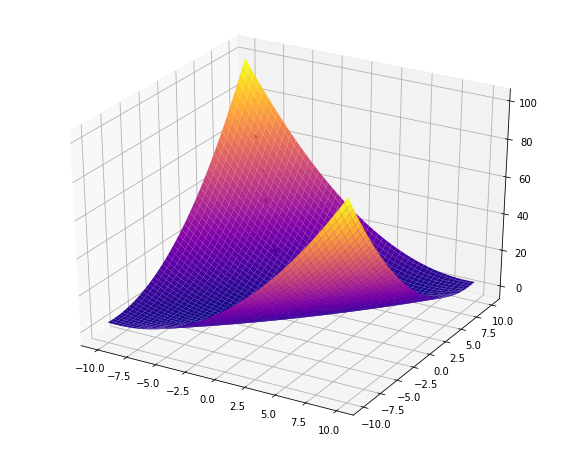

In [14]:
point = np.array([-10,10])
and_point = GD(f_mat, dx_mat, dy_mat, point, 0.001, 100, -10, 10 )
print(f_mat(point[0], point[1]), and_point)

0.0 [0 0]


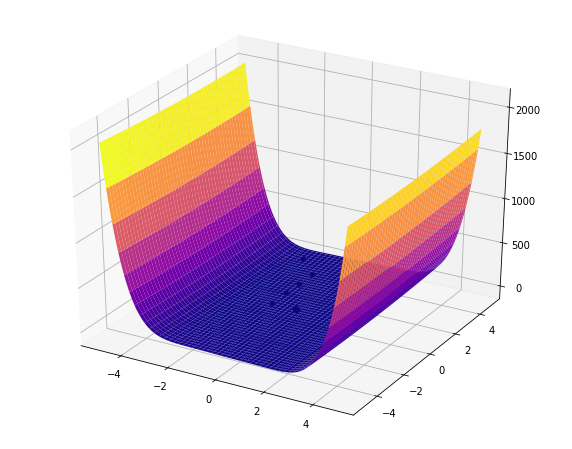

In [15]:
point = np.array([-5,5])
and_point = GD(f_3ver, dx_3ver, dy_3ver, point, 0.001, 100, -5, 5 )
print(f_3ver(point[0], point[1]), and_point)

16 [-2  3]


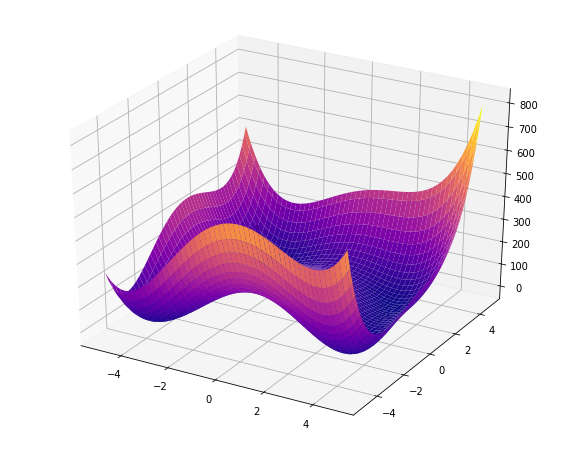

In [16]:
point = np.array([-5,5])
and_point = GD(f_him, dx_him, dy_him, point, 0.00001, 100, -5, 5 )
print(f_him(point[0], point[1]), and_point)

In [19]:
def SGD (f, dx, dy, point, lr, iter, m, l, r):
  '''
  f - входная функция
  dx, - производная функции по х
  dy, - производная функция по y
  point - точка входа
  lr, -  learning rate шаг
  iter, - кол-во итераций
  m, -  momentum factor 
  l, r - левая и правая граница x, y
  '''
  x = np.arange(l, r, 0.1)
  y = np.arange(l, r, 0.1)

  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  ax.plot_surface(X, Y, Z, cmap="plasma")

  lr = Lr(lr)

  for i in range(iter):
    gx = dx(point[0], point[1])
    gy = dy(point[0], point[1])
    
    if i == 0 :
      vx = gx
      vy = gy
    else:
      vx = m * vx + gx
      vy = m * vy + gy

    point[0] = point[0] - vx * lr.lr
    point[1] = point[1] - vy * lr.lr

    ax.scatter(point[0], point[1], f(point[0],point[1]), c='black');
  return point

0.0 [0 0]


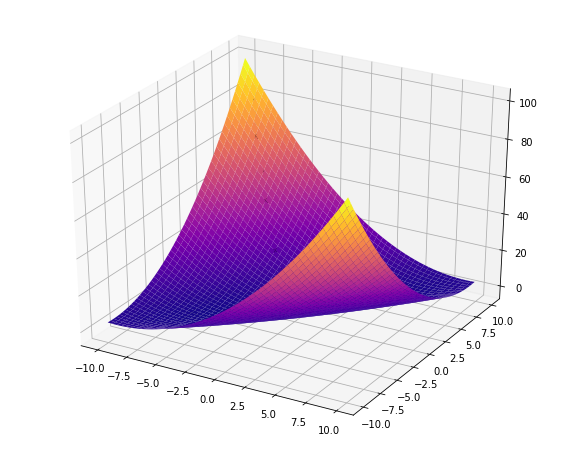

In [20]:
point = np.array([-10,10])
and_point = SGD(f_mat, dx_mat, dy_mat, point, 0.001, 10, 0.01, -10, 10 )
print(f_mat(point[0], point[1]), and_point)

0.0 [0 0]


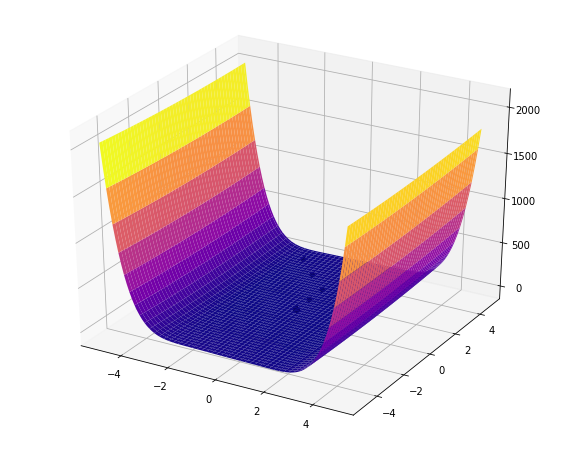

In [21]:
point = np.array([-5,5])
and_point = SGD(f_3ver, dx_3ver, dy_3ver, point, 0.001, 100, 0.1, -5, 5 )
print(f_3ver(point[0], point[1]), and_point)

50 [-2  2]


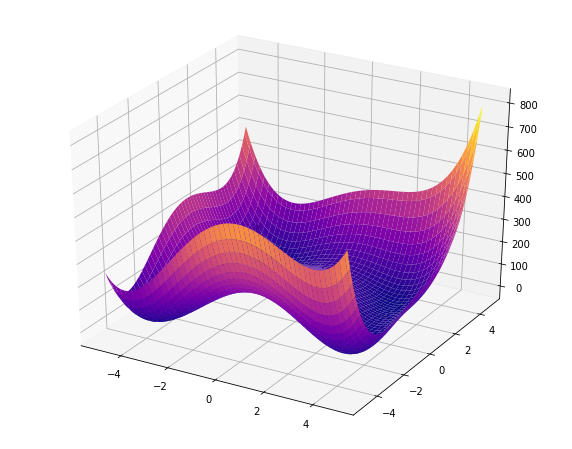

In [22]:
point = np.array([-5,5])
and_point = SGD(f_him, dx_him, dy_him, point, 0.00001, 100, 0.1, -5, 5 )
print(f_him(point[0], point[1]), and_point)

In [23]:
def ADAGRAD (f, dx, dy, point, lr, iter, l, r):
  '''
  f - входная функция
  dx, - производная функции по х
  dy, - производная функция по y
  point - точка входа
  lr, -  learning rate шаг
  iter, - кол-во итераций
  m, -  momentum factor 
  l, r - левая и правая граница x, y
  '''
  x = np.arange(l, r, 0.1)
  y = np.arange(l, r, 0.1)

  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  ax.plot_surface(X, Y, Z, cmap="gnuplot")

  lr = Lr(lr)

  s_sum_x = 0
  s_sum_y = 0

  for _ in range(iter):
    gx = dx(point[0], point[1])
    gy = dy(point[0], point[1])
    
    s_sum_x = s_sum_x  + gx * gx
    s_sum_y = s_sum_y  + gy * gy

    point[0] = point[0] - lr.lr * (gx / math.sqrt(s_sum_x))
    point[1] = point[1] - lr.lr * (gy / math.sqrt(s_sum_y))

    ax.scatter(point[0], point[1], f(point[0],point[1]), c='black');
  return point

0.0 [0 0]


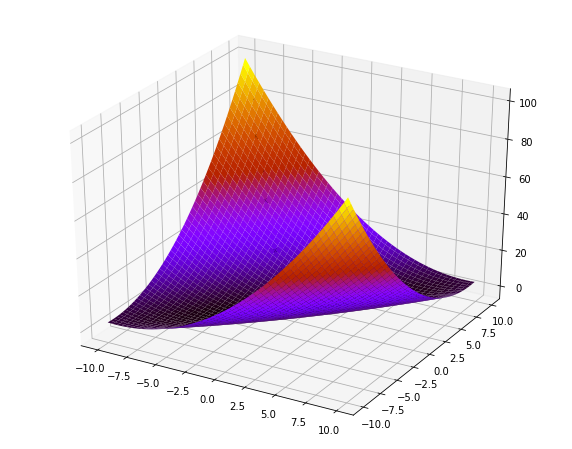

In [24]:
point = np.array([-10,10])
and_point =  ADAGRAD(f_mat, dx_mat, dy_mat, point, 0.001, 10, -10, 10 )
print(f_mat(point[0], point[1]), and_point)

0.0 [0 0]


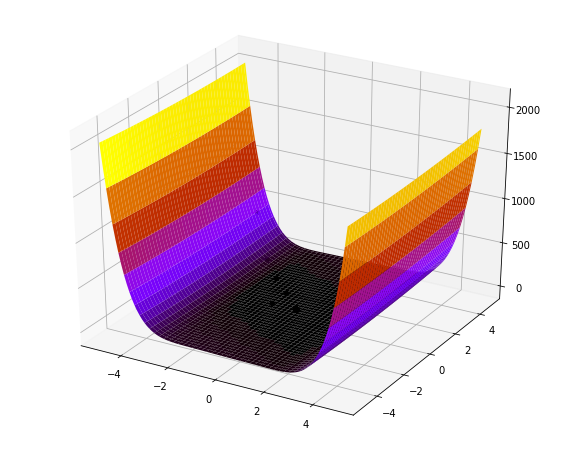

In [25]:
point = np.array([-5,5])
and_point = ADAGRAD(f_3ver, dx_3ver, dy_3ver, point, 0.001, 100, -5, 5 )
print(f_3ver(point[0], point[1]), and_point)

16 [-2  3]


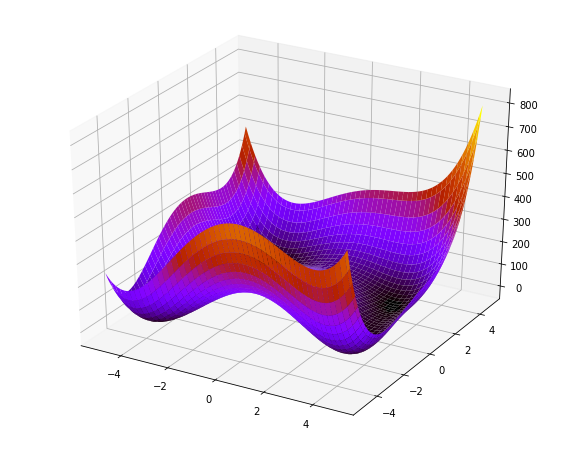

In [26]:
point = np.array([-5,5])
and_point = ADAGRAD(f_him, dx_him, dy_him, point, 0.00001, 100, -5, 5 )
print(f_him(point[0], point[1]), and_point)